# Prediccion del Bitcoin

Advertencia

Esto es un ejercicio con fines educativos, las predicciones pueden no ser reales del todo, no nos  
hacemos responsables de las inversiones realizadas

# 1. Obtener los datos

Lo primero que se tiene que hacer es obtener los datos crudos de alguna manera, he obtenido los datos de la siguiente liga:
https://mx.investing.com/crypto/bitcoin/historical-data

# 2. Modelo

C:\Users\luigu\AppData\Local\Temp\ipykernel_11636\1105929499.py:9: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('Data.csv', index_col='Date', parse_dates=True)
C:\Users\luigu\anaconda3\envs\Curso\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0142
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.9209e-04
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 4.5882e-04
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 3.4178e-04
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.2492e-04
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.7494e-04
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.7776e-04
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 2.6386e-04
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.0300e-04
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.5264e-04
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.9962e-04
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.1209e-04
Epoch 13/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1.7796e-04
Epoch 14/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2.

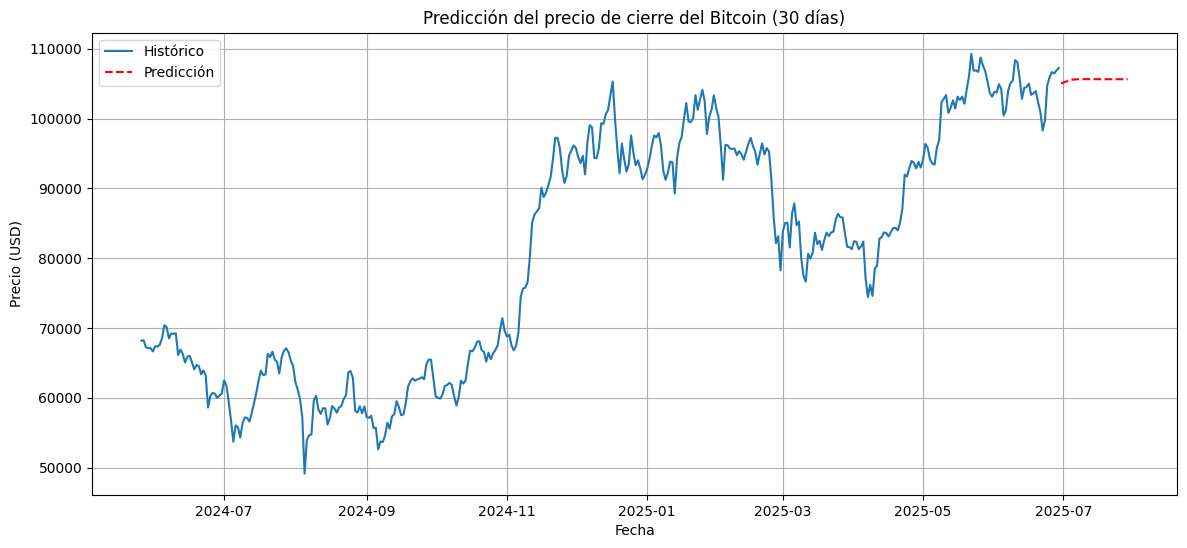

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. Cargar datos
df = pd.read_csv('Data.csv', index_col='Date', parse_dates=True)

# Seleccionar columnas relevantes
df_features = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()

# 2. Escalar características (cada columna entre 0 y 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_features)

# 3. Crear secuencias de 60 días y targets (predecimos Close)
X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i, 3])  # índice 3 es 'Close'

X, y = np.array(X), np.array(y)

# 4. Construir modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(60, 5)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 5. Entrenar modelo
model.fit(X, y, epochs=20, batch_size=32)

# 6. Predicción para 30 días futuros
future_days = 30
last_sequence = scaled_data[-60:]  # últimos 60 días completos
future_predictions = []

for _ in range(future_days):
    input_seq = last_sequence[-60:].reshape(1, 60, 5)
    pred = model.predict(input_seq, verbose=0)[0, 0]
    future_predictions.append(pred)

    # Para continuar prediciendo, se debe construir un vector para el nuevo día
    # Aquí usamos la predicción para 'Close' y copiamos los otros features del último día (simplificación)
    last_day = last_sequence[-1].copy()
    last_day[3] = pred  # reemplazamos Close por predicción
    last_sequence = np.vstack([last_sequence, last_day])

future_predictions = np.array(future_predictions).reshape(-1, 1)

# 7. Desescalar sólo la columna Close
# Necesitamos desescalar correctamente sólo la columna Close (índice 3)
# Para esto, creamos un array con ceros y ponemos las predicciones en la posición 3

dummy = np.zeros((future_days, scaled_data.shape[1]))
dummy[:, 3] = future_predictions[:, 0]

inv_scaled = scaler.inverse_transform(dummy)
predicted_close_prices = inv_scaled[:, 3]

# 8. Fechas futuras
last_date = df_features.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)

# 9. Imprimir predicciones día a día con fecha
for date, price in zip(future_dates, predicted_close_prices):
    print(f"{date.date()}: Precio predicho = ${price:.2f}")

# 10. Graficar
plt.figure(figsize=(14,6))
plt.plot(df_features.index[-400:], df_features['Close'][-400:], label='Histórico')
plt.plot(future_dates, predicted_close_prices, linestyle='--', color='red', label='Predicción')
plt.title('Predicción del precio de cierre del Bitcoin (30 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()
